In [4]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

page: 1
page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8
page: 9
page: 10


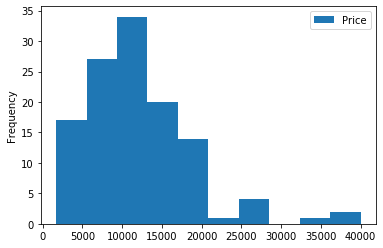

In [10]:
url = "https://www.elkjop.no/catalog/tv-og-bilde/no-tv/tv?PageNumber="
tv_prices_array = [] 
for page in range(1, 11):
    print('page:', page)
    response = requests.get(url + str(page))
    soup = BeautifulSoup(response.text, "html.parser")
    TV_names = soup.find_all('span', {'class':'table-cell'})
    TV_prices = soup.find_all('div', {'class': 'product-price'})
    for i in range(0, len(TV_names)):
        row = [TV_names[i].text, int("".join(TV_prices[i].text.split()))]
        tv_prices_array.append(row)
    time.sleep(0.5)
    
df = pd.DataFrame(tv_prices_array, columns=['TV Name', 'Price'])
df.plot.hist(bins=10)
df.to_csv('./Private Equity/elkjop_TV_prices.csv')
